In [108]:
import pandas as pd
import numpy as np
import random
import timeit
import random
from numpy import linalg
import matplotlib.pyplot as plt

def normalize(data):
    data = np.delete(data,np.where(~data.any(axis=0))[0], axis=1)
    data = (data - np.mean(data,axis=0))/np.std(data,axis=0)
    return data

def myPegasos(filename,k,numruns):
    file = pd.read_csv(filename)
    file = file.values
    Lambda = 5
    M1,N1 = file.shape
    ktot = 200
    
    #to convert labels to +1/-1
    file[:,0][file[:,0]==1] = 1 
    file[:,0][file[:,0]==3] = -1
    time_taken = np.zeros(5)
    temp = normalize(file[:,1:]) 

    file = np.append(file[:,0][None].T,temp,axis=1)
    
    print("For k=",k)
    #normalize data 
    #for the special case when k = 1
    if(k==1):
        f = np.zeros((numruns,ktot)) #initialize primal objective
        for loop in range(5): #run program for 5 loops
            index = random.randint(0, M1-1)
            X = file[index,:]
            Y = X[0]
            X = X[1:]
            start = timeit.default_timer()
            w = np.zeros(X.shape) #initialize w
            w.fill(1/np.sqrt(Lambda))
            for i in range(1,ktot+1):
                cond = Y*w.dot(X)
                while(cond>=1): # to find random sample that satisfies the inner product condition
                    index = random.randint(0, M1-1)
                    X = file[index,:]
                    Y = X[0]
                    X = X[1:]
                    cond = Y*w.dot(X)
                eta = 1/(Lambda*i)
                whalf = (1 - eta*Lambda)*w + (eta/k)*sum(Y*X)
                w = min(1,1/np.sqrt(Lambda)*linalg.norm(whalf))*whalf
                f[loop,i-1] = Lambda/2 *w.dot(w) + 1/k * (Y*w.dot(X))
            stop = timeit.default_timer()
            time_taken[loop] = stop - start
    else:
        #run pegasos algorithm for a given number of runs
        f = np.zeros((numruns,ktot)) #initialize primal objective
        for loop in range(numruns):
            #separate classes to select k/2 of them
            temp1 = file[:][file[:,0]==1]
            temp2 = file[:][file[:,0]==-1]
            index1 = np.random.choice(temp1.shape[0],int(k/2))
            X = temp1[index1,:]
            index2 = np.random.choice(temp2.shape[0],int(k/2))
            temp2 = temp2[index2,:]
            X=np.append(X,temp2,axis=0)
            Y = X[:,0] #store label
            X = X[:,1:] #remove label from X
            start = timeit.default_timer()
            w = np.zeros(X.shape[1])
            w.fill(1/np.sqrt(Lambda))
            for i in range(1,ktot+1): 
                M,N = X.shape
                eta = 1/(Lambda*i)
                inner_prod = w.dot(X.T)
                #print(inner_prod)
                cond = ((Y*inner_prod))<1 #obtain indexes for subset
                x = X[cond,:] 
                y = Y[cond]
                whalf = (1 - eta*Lambda)*w + (eta/k)*sum(y[:,None]*x)
                w = min(1,1/np.sqrt(Lambda)*linalg.norm(whalf))*whalf
                f[loop,i-1] = Lambda/2 *w.dot(w) + 1/k * sum(y*w.dot(x.T))
            stop = timeit.default_timer()
            time_taken[loop] = stop - start
    print('Mean Time: ', np.mean(time_taken))
    print('Standard Deviation Time:',np.std(time_taken))
    return f

ktot = 200
numruns = 5
f = np.zeros((5,numruns,ktot))
index=0
filename = "MNIST-13.csv"
K = [1,10,20,200,2000]
for k in K:
    f[index,:,:] = myPegasos(filename,k,numruns)
    index=index+1
#time_taken

For k= 1
Mean Time:  0.0225702501964
Standard Deviation Time: 0.00317790129041
For k= 10
Mean Time:  0.0160994647988
Standard Deviation Time: 0.000513156832158
For k= 20
Mean Time:  0.0371870566014
Standard Deviation Time: 0.00696020907349
For k= 200
Mean Time:  0.2502064342
Standard Deviation Time: 0.058035556623
For k= 2000
Mean Time:  4.1455753384
Standard Deviation Time: 0.232383934082


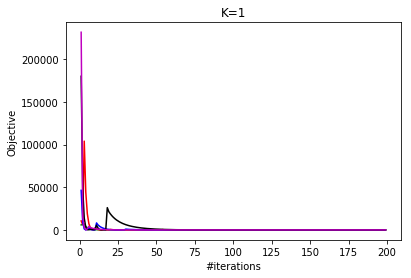

In [104]:
#one = [0:200]
col=['g','r','b','k','m']
for loop in range(5):
    x_axis=one[1:200]
    y_axis=f[0,loop,1:200]
    plt.plot(x, y, col[loop])
plt.xlabel('#iterations')
plt.ylabel('Objective')
plt.title('K=1')
plt.show()

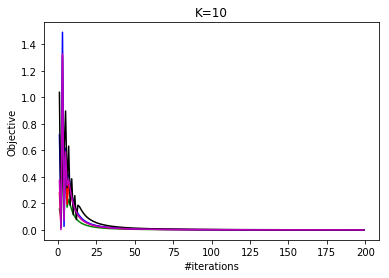

In [103]:
for loop in range(5):
    x=one[1:200]
    y=f[1,loop,1:200]
    plt.plot(x, y, col[loop])
plt.xlabel('#iterations')
plt.ylabel('Objective')
plt.title('K=10')
plt.show()

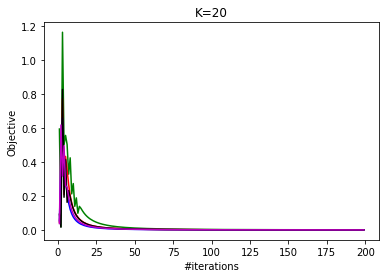

In [102]:
for loop in range(5):
    x=one[1:200]
    y=f[2,loop,1:200]
    plt.plot(x, y, col[loop])
plt.xlabel('#iterations')
plt.ylabel('Objective')
plt.title('K=20')
plt.show()

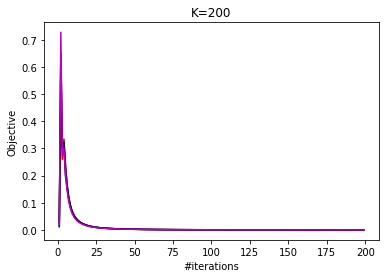

In [101]:
for loop in range(5):
    x=one[1:200]
    y=f[3,loop,1:200]
    plt.plot(x, y, col[loop])
plt.xlabel('#iterations')
plt.ylabel('Objective')
plt.title('K=200')
plt.show()

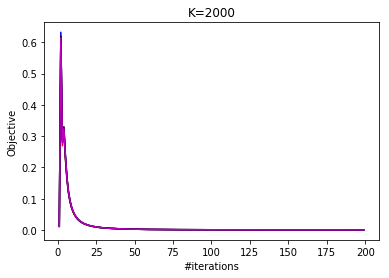

In [100]:
for loop in range(5):
    x=one[1:200]
    y=f[4,loop,1:200]
    plt.plot(x, y, col[loop])
plt.xlabel('#iterations')
plt.ylabel('Objective')
plt.title('K=2000')
plt.show()